In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import sqlite3
con = sqlite3.connect(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Amazon_data_analysis/database.sqlite')
type(con)

sqlite3.Connection

In [4]:
# You can check online its table name of "database.sqlite" on https://sqliteonline.com/

In [20]:
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

In [7]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] 

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [8]:
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
df=df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]
df.shape

(568452, 10)

In [14]:
df[df.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])]
df=df.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text'])
df.shape

(393931, 10)

In [15]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [21]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [22]:
df['Time']=pd.to_datetime(df['Time'], unit='s')
'''
As default: unix start time "1970-01-01"
00:00:01.303862400 - by default this time is in "nano-second" as default value of unit = "ns"
so lets customize "unit" parameter to get time in second
'''
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
df['UserId'].value_counts()[0:10]

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64

In [28]:
recommend_df = df.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  }).sort_values(by='ProductId' , ascending=False)
recommend_df.columns = ['Number_of_summaries' , 'num_text' , 'avg_score' , 'No_of_prods_purchased']
recommend_df.head()

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256


In [30]:
# Top 10 users
x=df['UserId'].value_counts()[0:10].index
x
y=df['UserId'].value_counts()[0:10].values
y

array([448, 421, 389, 365, 256, 204, 201, 199, 178, 176])

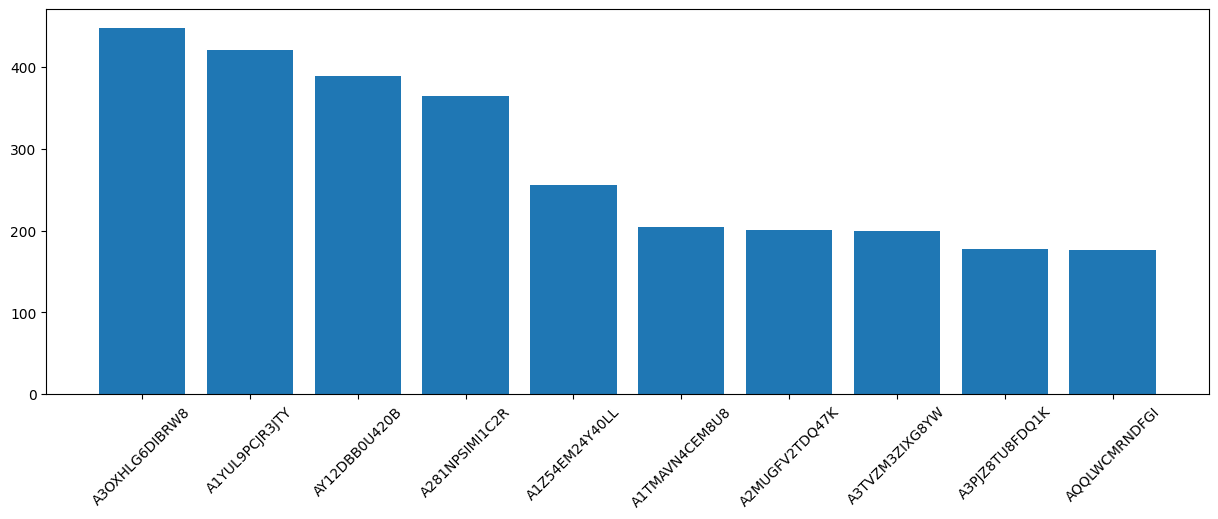

In [32]:
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

In [34]:
# Which product has good reviews?
len(df['ProductId'].unique())

74258

In [39]:
product_df=df['ProductId'].value_counts().to_frame()
product_df=product_df.reset_index()
product_df.head()

,ProductId,count
0,B007JFMH8M,913
1,B002QWHJOU,632
2,B0026RQTGE,632
3,B002QWP89S,632
4,B002QWP8H0,632


In [42]:
product_df2=product_df[product_df['count']>500]
product_df2.head()

,ProductId,count
0,B007JFMH8M,913
1,B002QWHJOU,632
2,B0026RQTGE,632
3,B002QWP89S,632
4,B002QWP8H0,632


In [47]:
df3=df[df['ProductId'].isin(product_df2['ProductId'])]
df3

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


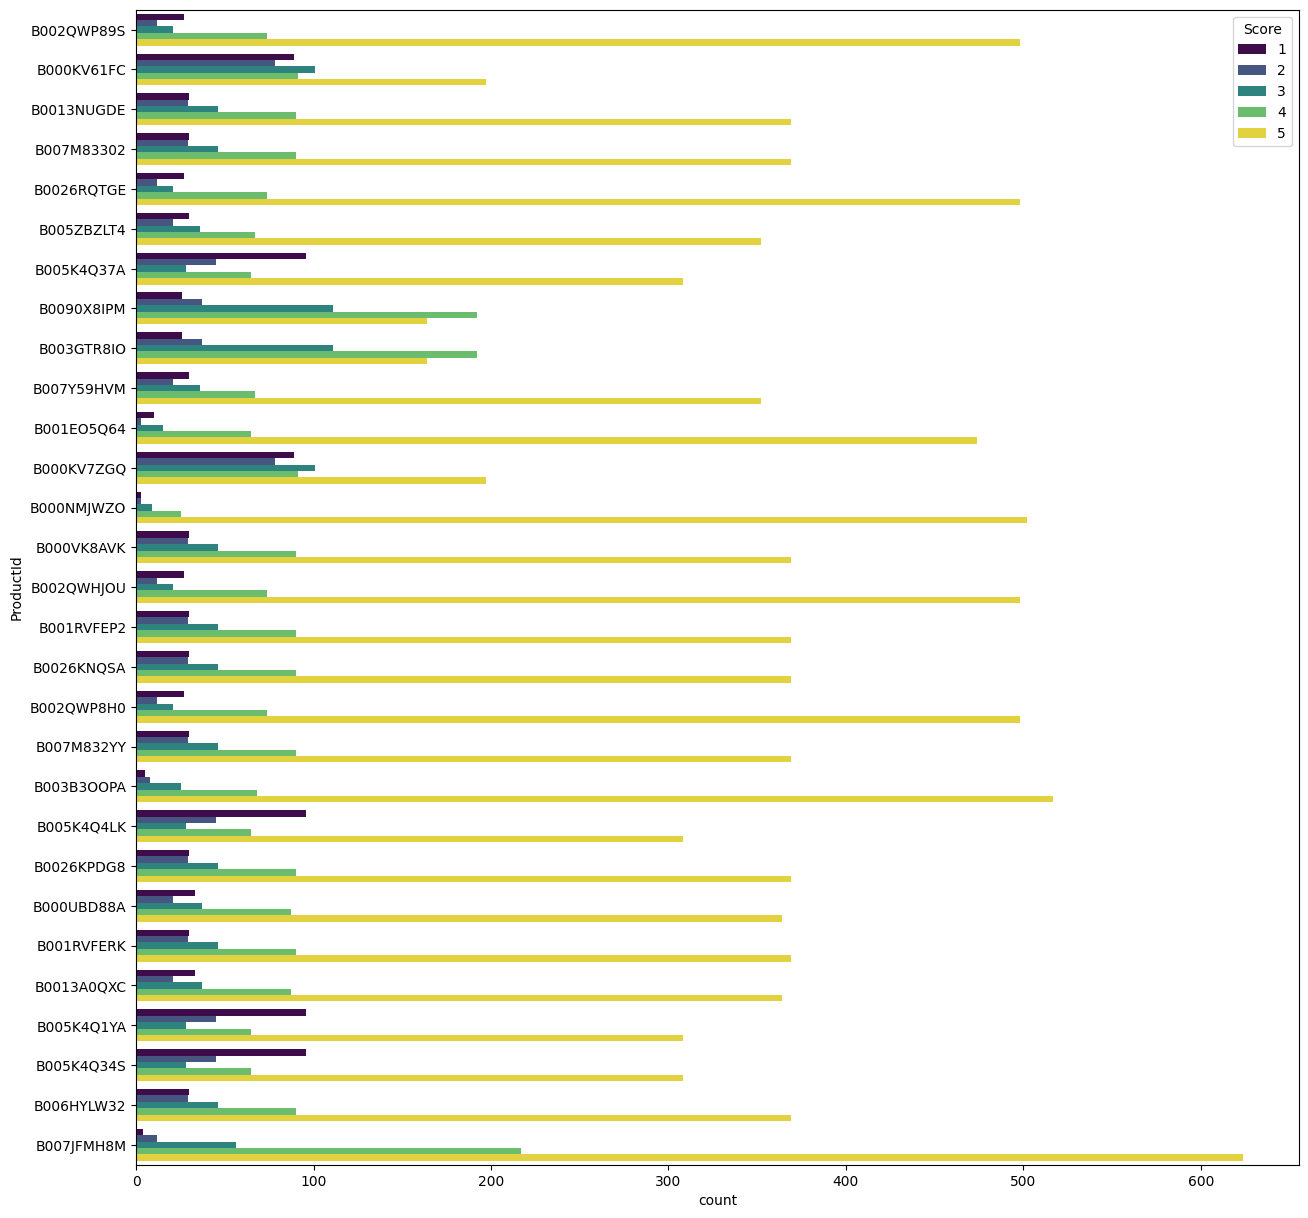

In [49]:
plt.figure(figsize=(15,15))
sns.countplot(y='ProductId', data = df3, hue='Score',palette='viridis')
plt.show()

In [57]:
# Understanding behavior of Amazon customers
df.head()
y=df['UserId'].value_counts()
y

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
AEW1UWTI3MCVN       1
ALMANY3CKWVH7       1
A1UJMVE0LCOI45      1
A6RFVZFCCPPAB       1
A24LQ099X444C1      1
Name: count, Length: 256059, dtype: int64

In [52]:
df['UserId'][0]

'A3SGXH7AUHU8GW'

In [59]:
df['Viewer_Type'] = df['UserId'].apply(lambda user : "Frequent" if y[user]>50 else "Not Frequent")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [62]:
df4=df[df['Viewer_Type']=='Frequent']
df5=df[df['Viewer_Type']=='Not Frequent']

In [63]:
df4.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,2008-05-02,Great taste and convenience,We really like the McCann's steel cut oats but...,Frequent
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,2007-10-19,good,Good oatmeal. I like the apple cinnamon the b...,Frequent
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,2011-09-19,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,Frequent
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,2011-04-03,Good Licorice,Twizzlers brand licorice is much better than t...,Frequent


In [64]:
df5.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [65]:
df4['Score'].value_counts()/len(df4)*100

Score
5    58.850870
4    20.871143
3    10.344828
1     5.422513
2     4.510646
Name: count, dtype: float64

In [66]:
df5['Score'].value_counts()/len(df5)*100

Score
5    64.086960
4    13.911916
1     9.350881
3     7.383354
2     5.266889
Name: count, dtype: float64

<Axes: ylabel='count'>

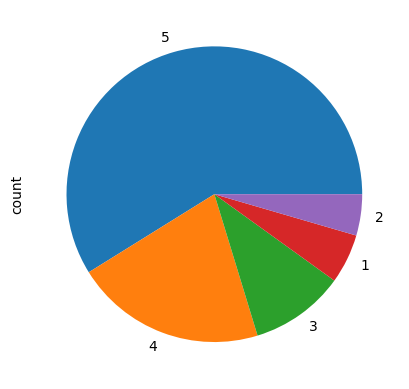

In [67]:
df4['Score'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

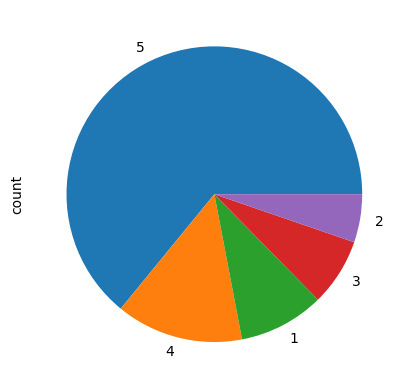

In [69]:
df5['Score'].value_counts().plot(kind='pie')

In [70]:
# Are frequent users more verbose?
df6=df[['UserId' , 'ProductId' , 'Text']]
df6.head()

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...


In [73]:
def calculate_length(text):
    return len(text.split(' '))

In [74]:
df['Text_length'] = df['Text'].apply(calculate_length)

In [75]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30


In [76]:
d2=df[df['Viewer_Type']=='Frequent']
d3=df[df['Viewer_Type']=='Not Frequent']

(0.0, 600.0)

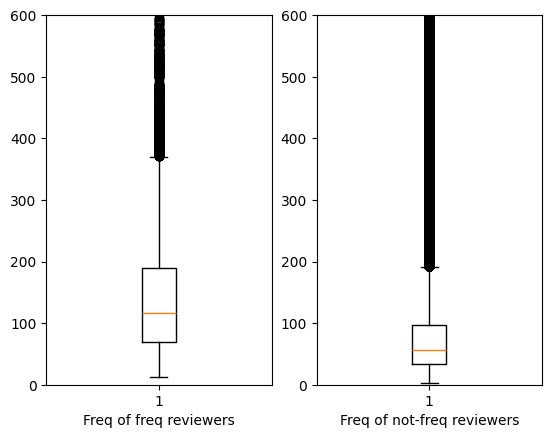

In [78]:
# define figure so that u can customize as per your need !

fig = plt.figure() 
#add subplots
ax1 = fig.add_subplot(121)
ax1.boxplot(d2['Text_length'])
ax1.set_xlabel('Freq of freq reviewers') ## adding xlabel
ax1.set_ylim(0,600) ## setting limit on y-axis..

ax2 = fig.add_subplot(122)
ax2.boxplot(d3['Text_length'])
ax2.set_xlabel('Freq of not-freq reviewers')
ax2.set_ylim(0,600)

In [79]:
from textblob import TextBlob
TextBlob(df['Summary'][0]).sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [80]:
# Extracting polarity for all comments
polarity=[]
for comment in df['Summary']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [81]:
len(polarity)

568454

In [82]:
df['Polarity']=polarity
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type,Text_length,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [84]:
df_negative= df[df['Polarity']<0]
df_positive= df[df['Polarity']>0]

In [85]:
from wordcloud import WordCloud , STOPWORDS

In [86]:
set(STOPWORDS) # StopWords are those words that are removed during text analysis

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

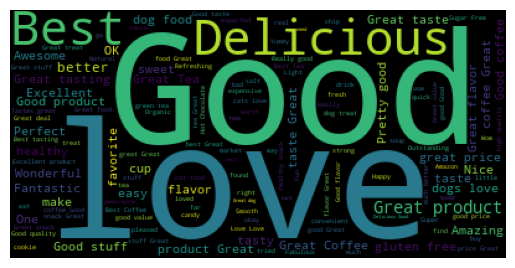

In [88]:
total_comments_positive = ' '.join(df_positive['Summary'])
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.imshow(wordcloud)
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

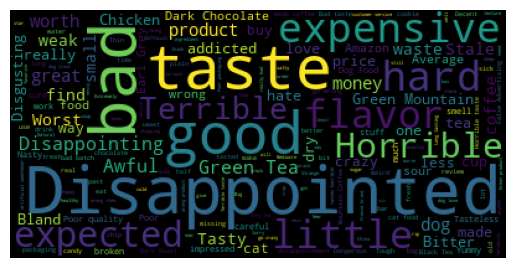

In [89]:
total_comments_negative = ' '.join(df_negative['Summary'])
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)
plt.imshow(wordcloud)
plt.axis('off')

In [90]:
from collections import Counter

In [91]:
Counter(df_positive['Summary']).most_common(10) # most used positive keywords

[('Delicious!', 2462),
 ('Delicious', 2316),
 ('Great product', 1091),
 ('Excellent', 985),
 ('Love it!', 910),
 ('Great Product', 910),
 ('Great', 749),
 ('Great!', 748),
 ('Excellent!', 573),
 ('Great Coffee', 558)]

In [92]:
Counter(df_negative['Summary']).most_common(10) # most used negative keywords

[('Disappointed', 587),
 ('Disappointing', 300),
 ('disappointed', 184),
 ('Not what I expected', 174),
 ('Awful', 164),
 ('Horrible', 164),
 ('Terrible', 145),
 ('Disgusting', 143),
 ('Not good', 118),
 ('Stale', 102)]